# Interactive plot for data analysis
## Monte Carlo simulations were perfomed for the transport of mono-energetic proton beams in water and score phase space files at the Bragg Peak position for further analysis. 
## A program in python was implemented to analyse the output from those simulations

### Step 1: Importing the libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.ticker as ticker

### Step 2: Implementing a class for reading and cleaning of the phase space files.

In [13]:
class Reader:
    
    def __init__(self,name):
        self.name=name


    def open_phsp(self):
        #load file
        try:
            energy = pd.read_csv(self.name, delimiter="\s+")
        except:
            print('phsp file not found or empty: ', self.name)
            return(0)
                   
        Ein_data = pd.DataFrame(energy)
        Ein_data.columns = ['X_cm', 'Y_cm', 'Z_cm', 'CosX', 'CosY', 'E_MeV', 'W', 'ptype', 'f1','f2','t1','Time']     
        
        if('true' in Ein_data.isnull().any()):
            print('null data in file')
        else:
            print('no null data found in file')
    
        return(Ein_data.E_MeV,Ein_data.Time)


### Step 3: Main program: loading files and process them for generationof graphs

reading phsp number=  0
no null data found in file
reading phsp number=  1
no null data found in file
reading phsp number=  2
no null data found in file


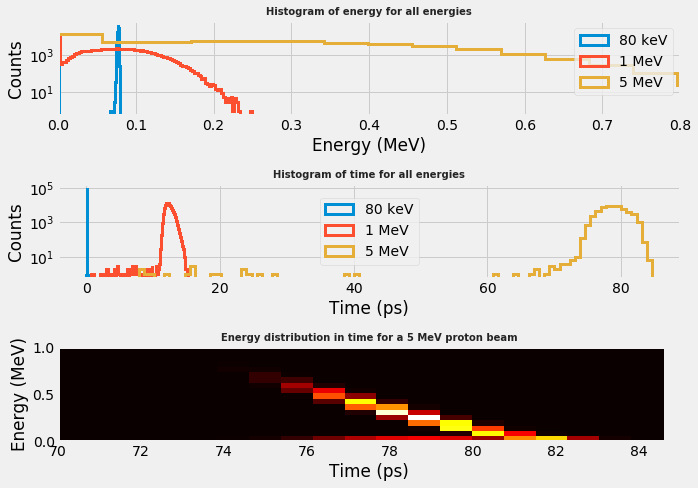

In [14]:
def main():
    directory = '/Users/balder/Documents/Proy2/stage2/all/'
    e80kv = directory + 'BP_80kv_26gcc.phsp'    #file for the 80 keV proton beam
    e1mv = directory + 'BP_1mv_26gcc.phsp'      #file for the 1 MeV proton beam
    e5mv = directory + 'BP_5mv_26gcc.phsp'      #file for the 5 MeV proton beam
     
    energies=[e80kv,e1mv,e5mv]                 #list of energies
    labels=['80 keV','1 MeV','5 MeV']          #list of labels

    data = []
    bins=100
    fig, ax = plt.subplots(3, 1, figsize=(10,7), tight_layout=True)
    
    for j in range(len(energies)):
        print('reading phsp number= ', j)
        phsp = Reader(energies[j])
        data = phsp.open_phsp()
        energy = data[0]
        energyFiltered = energy[energy > 0]     #drop values for energies equals zero
        time = data[1] * 1000                   #convert from ns to ps
        ax[0].hist(energyFiltered,bins,histtype='step',label=labels[j],linewidth=3.0)
        ax[1].hist(time,bins,histtype='step',label=labels[j],linewidth=3.0)
           
    
    ax[0].set_title('Histogram of energy for all energies',fontsize = 10, weight = 'bold', alpha = .85)        
    ax[0].set_xlabel('Energy (MeV)')
    ax[0].set_ylabel('Counts')
    ax[0].set_yscale('log')
    ax[0].legend()
    ax[0].set_xlim([0,0.8])

    
    ax[1].set_title('Histogram of time for all energies',fontsize = 10, weight = 'bold', alpha = .85)        
    ax[1].set_xlabel('Time (ps)')
    ax[1].set_yscale('log')
    ax[1].set_ylabel('Counts')
    ax[1].legend(loc='center')
    
    im=ax[2].hist2d(time,energyFiltered,bins=(bins,bins),cmap=plt.cm.hot)
    ax[2].set_title('Energy distribution in time for a 5 MeV proton beam',fontsize = 10, weight = 'bold', alpha = .85)        
    ax[2].set_xlabel('Time (ps)')
    ax[2].set_ylabel('Energy (MeV)')
    ax[2].set_ylim([0,1])
    ax[2].set_xlim([70,85])
    
    plt.show()
    

    
if __name__ == "__main__":
    main()